In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
sam_mask = np.load('door_mask.npy')
print(sam_mask.shape)

boolean_mask = sam_mask[0]
boolean_mask.shape

(3, 1280, 720)


(1280, 720)

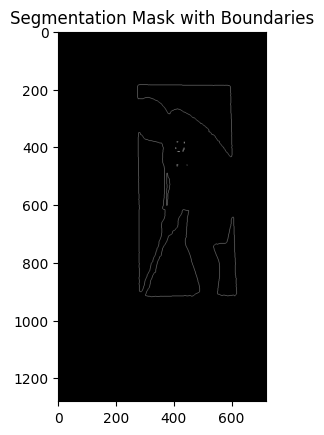

In [3]:
# Convert boolean mask to an 8-bit unsigned integer mask
int_mask = (boolean_mask * 255).astype(np.uint8)

# Convert the mask to a BGR image
bgr_mask = cv2.merge([int_mask, int_mask, int_mask])

# Convert the mask to grayscale
imgray = cv2.cvtColor(bgr_mask, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Create an empty image for drawing contours
tmp = np.zeros_like(bgr_mask)

# Draw the contours on the empty image
boundary = cv2.drawContours(tmp, contours, -1, (255, 255, 255), 1)

# Convert the boundary image to grayscale
boundary_gray = cv2.cvtColor(boundary, cv2.COLOR_BGR2GRAY)

# Set boundary pixels to 255
boundary_gray[boundary_gray > 0] = 255

# Visualize the boundary
plt.imshow(boundary_gray, cmap='gray')
plt.title('Segmentation Mask with Boundaries')
plt.show()

# Save the boundary image
plt.imsave("mask_boundary2.png", boundary_gray, cmap='gray')

In [4]:
boundary_gray.shape

(1280, 720)

In [5]:
# [{'x': 240, 'y': 160, 'width': 414, 'height': 784, 'label': ''}]

# Example top left corner and crop size
top_left_x = 240 # X coordinate of the top left corner
top_left_y = 160  # Y coordinate of the top left corner
crop_width = 414  # Width of the crop region
crop_height = 784  # Height of the crop region

# Perform the cropping operation
cropped_image = boundary_gray[top_left_y:top_left_y + crop_height, top_left_x:top_left_x + crop_width]

# Display the cropped image shape
print("Cropped image shape:", cropped_image.shape)

Cropped image shape: (784, 414)


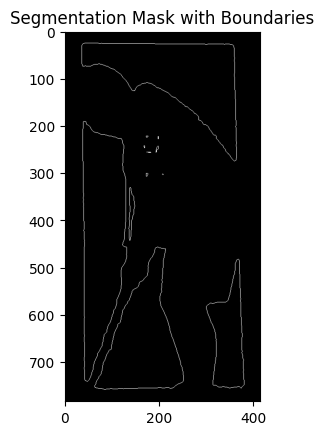

In [6]:
# Visualize the boundary
plt.imshow(cropped_image, cmap='gray')
plt.title('Segmentation Mask with Boundaries')
plt.show()

# Save the boundary image
plt.imsave("cropped_image.png", cropped_image, cmap='gray')

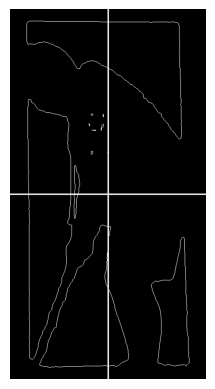

In [7]:

# Assuming 'image' is your NumPy array representing the image
# Make sure the image is in the BGR format as OpenCV uses BGR format

# Get the dimensions of the image
height, width = cropped_image.shape[:3]

# Define the color (BGR format) and thickness of the lines
color = (255, 0, 0)  # Blue color (in BGR format)
thickness = 2  # Thickness of the line

# Calculate the midpoints
mid_width = width // 2
mid_height = height // 2

# Draw a vertical line in the middle
cv2.line(cropped_image, (mid_width, 0), (mid_width, height), color, thickness)

# Draw a horizontal line in the middle
cv2.line(cropped_image, (0, mid_height), (width, mid_height), color, thickness)

# Display the resulting image using matplotlib
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.imsave("box_image.png", cropped_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

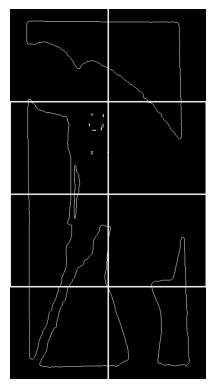

In [8]:
# Assuming 'image' is your NumPy array representing the image

# Get the dimensions of the image
height, width = cropped_image.shape[:2]

# Define the color (BGR format) and thickness of the box
color = (255, 255, 255)  # Green color (in BGR format)
thickness = 2  # Thickness of the box outline

# Calculate the midpoints
mid_width = width // 2
mid_height = height // 2

# Calculate the top-left and bottom-right coordinates of the box
box_width = width 
box_height = height // 2
top_left_x = mid_width - (box_width // 2)
top_left_y = mid_height - (box_height // 2)
bottom_right_x = mid_width + (box_width // 2)
bottom_right_y = mid_height + (box_height // 2)

# Draw the rectangle (box)
cv2.rectangle(cropped_image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), color, thickness)

# Display the resulting image using matplotlib
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.imsave("box_image1.png", cropped_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()
